In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Balanced_Augmented_Chiller_Data_VAE.csv', encoding='unicode_escape')
data

C:\Users\Hsiao-ping.ni\Anaconda3\envs\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ï»¿Ã¯Â»Â¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG),label_column
0,0.201936,0.396086,0.293438,0.354670,0.718421,0.331036,0.368494,0.582634,0.662495,0.334736,0.606919,0.559195,1
1,0.180892,0.387931,0.217825,0.269876,0.788775,0.276522,0.311242,0.690165,0.691193,0.231781,0.564821,0.544124,0
2,0.319267,0.368194,0.343462,0.313049,0.681635,0.316290,0.310046,0.622774,0.635756,0.318461,0.533441,0.489382,0
3,0.293791,0.400863,0.306173,0.353991,0.693678,0.340894,0.385205,0.625660,0.659035,0.363997,0.601025,0.553360,1
4,0.258942,0.384838,0.278578,0.384323,0.700210,0.316189,0.337565,0.632190,0.668897,0.294055,0.547481,0.507317,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.293734,0.393107,0.319918,0.370286,0.700369,0.386346,0.403267,0.580859,0.620816,0.420494,0.557582,0.572722,1
2496,0.249517,0.348688,0.214091,0.308448,0.753071,0.262514,0.245265,0.701192,0.689147,0.236341,0.475598,0.482275,0
2497,0.376096,0.429668,0.366578,0.421561,0.636898,0.357127,0.377550,0.576298,0.596270,0.372791,0.508612,0.493615,0
2498,0.322940,0.340702,0.341008,0.354830,0.680064,0.345681,0.356874,0.597279,0.633645,0.326242,0.527795,0.488862,1


[I 2024-12-13 08:59:23,677] A new study created in memory with name: no-name-6e5d49d1-8865-45a5-b395-b7d50dd3a7ee
C:\Users\Hsiao-ping.ni\Anaconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
[I 2024-12-13 09:01:31,272] Trial 0 finished with value: 0.2428560197353363 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.0013450571043490303, 'batch_size': 64}. Best is trial 0 with value: 0.2428560197353363.
[I 2024-12-13 09:04:26,400] Trial 1 finished with value: 0.24494530856609345 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 32, 'latent_dim': 14, 'learning_rate': 0.004019923979031565, 'batch_size': 48}. Best is trial 0 with value: 0.2428560197353363.
[I 2024-12-13 09:08:03,962] Trial 2 finished with value: 0.24627908021211625 and

[I 2024-12-13 10:24:47,511] Trial 31 finished with value: 0.24066745340824128 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 12, 'learning_rate': 0.00010832346999748088, 'batch_size': 64}. Best is trial 31 with value: 0.24066745340824128.
[I 2024-12-13 10:26:41,763] Trial 32 finished with value: 0.2413898378610611 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 12, 'learning_rate': 0.00010411477380117182, 'batch_size': 64}. Best is trial 31 with value: 0.24066745340824128.
[I 2024-12-13 10:28:35,747] Trial 33 finished with value: 0.24151373505592347 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 12, 'learning_rate': 0.00011300610454860353, 'batch_size': 64}. Best is trial 31 with value: 0.24066745340824128.
[I 2024-12-13 10:30:54,333] Trial 34 finished with value: 0.24318157136440277 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 14, 'learning_rate': 0.00014681203596412005, 'batch_size': 48}. Best is

[I 2024-12-13 11:37:17,829] Trial 63 finished with value: 0.24116308987140656 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 12, 'learning_rate': 0.00011943081928202448, 'batch_size': 64}. Best is trial 31 with value: 0.24066745340824128.
[I 2024-12-13 11:39:15,277] Trial 64 finished with value: 0.24126171916723252 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.00028840596021965025, 'batch_size': 64}. Best is trial 31 with value: 0.24066745340824128.
[I 2024-12-13 11:41:08,368] Trial 65 finished with value: 0.24220265150070192 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 48, 'latent_dim': 6, 'learning_rate': 0.0001580186993105341, 'batch_size': 64}. Best is trial 31 with value: 0.24066745340824128.
[I 2024-12-13 11:43:03,788] Trial 66 finished with value: 0.241637621819973 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 12, 'learning_rate': 0.00012147883540348713, 'batch_size': 64}. Best is tr

[I 2024-12-13 12:44:11,674] Trial 95 finished with value: 0.24275974929332733 and parameters: {'hidden_dim1': 64, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.0011870802858780605, 'batch_size': 64}. Best is trial 75 with value: 0.24061093479394913.
[I 2024-12-13 12:46:21,948] Trial 96 finished with value: 0.24078958183526994 and parameters: {'hidden_dim1': 64, 'hidden_dim2': 64, 'latent_dim': 12, 'learning_rate': 0.0001110082562863354, 'batch_size': 64}. Best is trial 75 with value: 0.24061093479394913.
[I 2024-12-13 12:48:31,124] Trial 97 finished with value: 0.24146278351545333 and parameters: {'hidden_dim1': 64, 'hidden_dim2': 64, 'latent_dim': 12, 'learning_rate': 0.00010930744510272695, 'batch_size': 64}. Best is trial 75 with value: 0.24061093479394913.
[I 2024-12-13 12:50:42,710] Trial 98 finished with value: 0.24122647047042847 and parameters: {'hidden_dim1': 80, 'hidden_dim2': 64, 'latent_dim': 12, 'learning_rate': 0.00011279821069601062, 'batch_size': 64}. Best is 

Best hyperparameters: {'hidden_dim1': 32, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00010231608462002771, 'batch_size': 64}
Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 1.0233
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7853
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6376
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5387
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4729
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4256
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3882
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3655
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3493
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3332
Epoch 11/100
32/32 [==============================] - 0s 3ms/

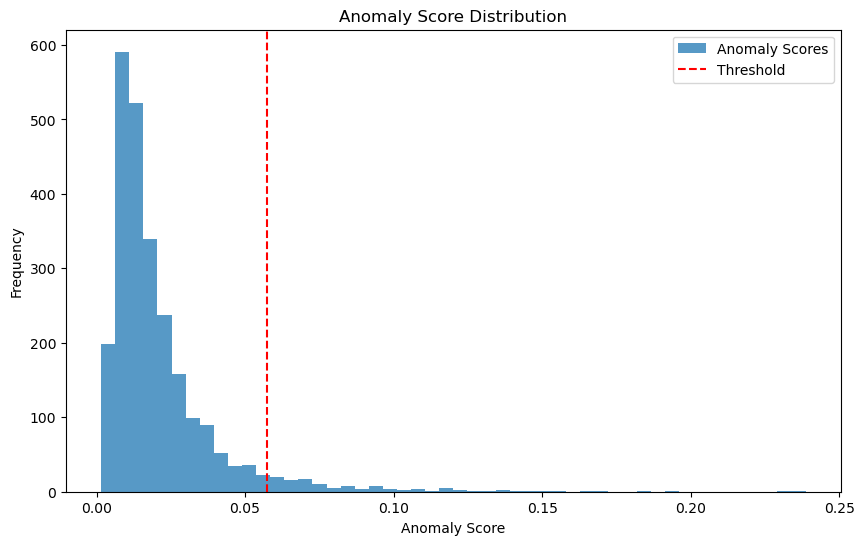

Anomaly-labeled data saved to /Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Anomaly_Detection_Results.xlsx.


In [3]:
# Load and preprocess the data
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Imbalanced_Augmented_Chiller_Data_VAE.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Define the Sampling layer for VAE
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# Define VAE architecture
def build_vae(input_dim, hidden_dims, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = inputs
    for dim in hidden_dims:
        x = Dense(dim, activation='relu')(x)
    mean = Dense(latent_dim)(x)
    log_var = Dense(latent_dim)(x)
    z = Sampling()([mean, log_var])
    encoder = Model(inputs, [mean, log_var, z], name="encoder")
    
    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = latent_inputs
    for dim in reversed(hidden_dims):
        x = Dense(dim, activation='relu')(x)
    outputs = Dense(input_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name="decoder")
    
    # VAE Model
    reconstructed = decoder(encoder(inputs)[2])
    vae = Model(inputs, reconstructed, name="vae")
    
    # VAE Loss
    reconstruction_loss = mse(inputs, reconstructed) * input_dim
    kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=16)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    latent_dim = trial.suggest_int('latent_dim', 2, 16, step=2)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 64, step=16)
    
    hidden_dims = [hidden_dim1, hidden_dim2]
    vae, _, _ = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        history = vae.fit(x_train_fold, x_train_fold, validation_data=(x_val_fold, x_val_fold), 
                          epochs=100, batch_size=batch_size, verbose=0)
        val_loss = min(history.history['val_loss'])
        val_losses.append(val_loss)
    
    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final VAE using the best hyperparameters
hidden_dims = [best_params['hidden_dim1'], best_params['hidden_dim2']]
latent_dim = best_params['latent_dim']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']

vae, encoder, decoder = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history = vae.fit(X_train, X_train, epochs=100, batch_size=batch_size, verbose=1)

# Anomaly detection on the full dataset (including test set)
reconstructions = vae.predict(data_scaled)
anomaly_scores = np.mean(np.square(data_scaled - reconstructions), axis=1)

# Set an anomaly threshold
threshold = np.percentile(anomaly_scores, 95)  # Top 5% as anomalies
anomalies = anomaly_scores > threshold

# Print anomaly results
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# Visualize anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50, alpha=0.75, label='Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Add anomaly labels to the original dataset
data['Anomaly'] = anomalies.astype(int)

# Save the anomaly-labeled data to an Excel file

output_path = '/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Anomaly_Detection_Results.xlsx'
data.to_excel(output_path, index=False)
print(f"Anomaly-labeled data saved to {output_path}.")


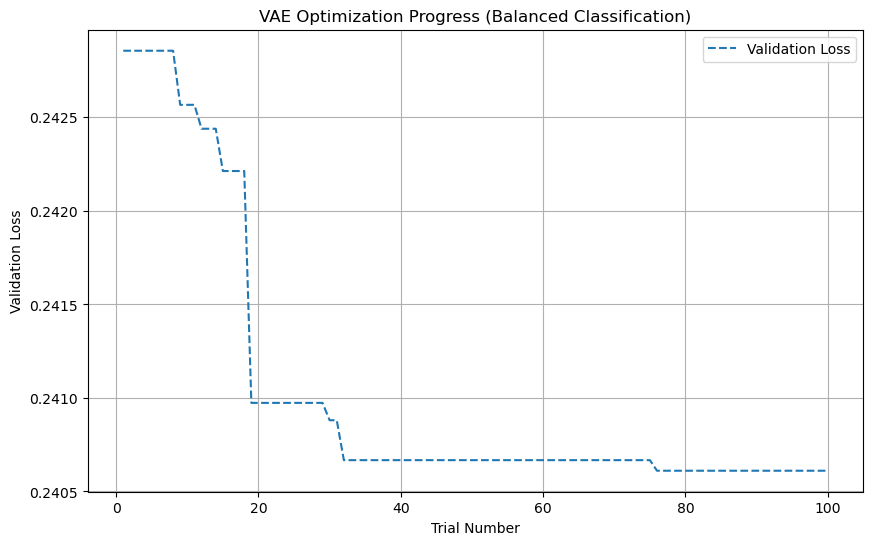

In [23]:
# Plot the optimization progress with adjusted validation loss
validation_losses = study.trials_dataframe()['value'].values  # Validation losses from all trials
best_val_loss = np.min(validation_losses)  # Best validation loss found
adjusted_validation_losses = []

# Loop through trials and update adjusted_validation_losses
current_best_loss = float('inf')
for val_loss in validation_losses:
    # Update the best validation loss found so far
    current_best_loss = min(current_best_loss, val_loss)
    adjusted_validation_losses.append(current_best_loss)

# Plot optimization progress
plt.figure(figsize=(10, 6))
#plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Original Validation Loss')
plt.plot(range(1, len(adjusted_validation_losses) + 1), adjusted_validation_losses, 
         label='Validation Loss', linestyle='--')
plt.xlabel('Trial Number')
plt.ylabel('Validation Loss')
plt.title('VAE Optimization Progress (Balanced Classification)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Print the best trial and validation loss
best_trial_index = np.argmin(validation_losses)
print(f"Best validation loss: {best_val_loss} at trial {best_trial_index + 1}")

Best validation loss: 0.24061093479394913 at trial 76


16/16 [==============================] - 0s 4ms/step
Anomaly threshold (based on training data): 0.05753603746807827
Number of anomalies detected in the test set: 22


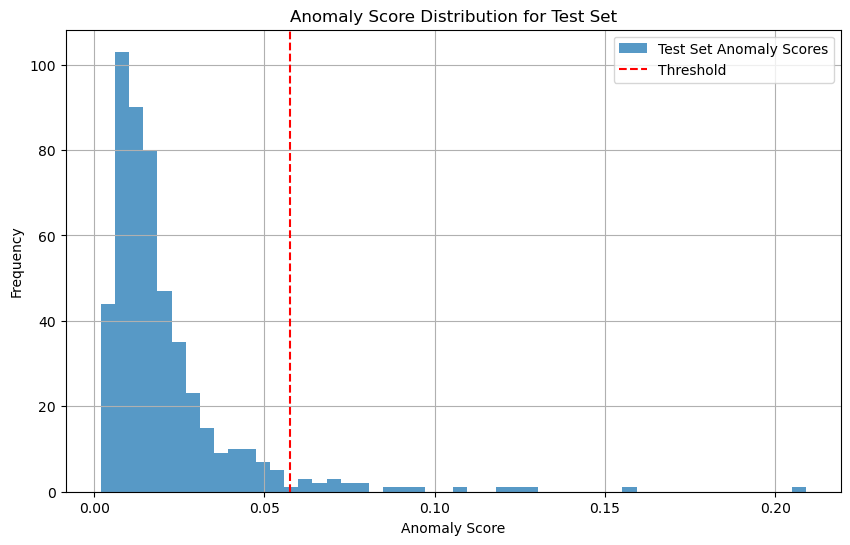

In [25]:
# Detect anomalies specifically on the test set

# Predict reconstructions for the test data
reconstructions_test = vae.predict(X_test)

# Calculate anomaly scores for the test set (reconstruction error)
anomaly_scores_test = np.mean(np.square(X_test - reconstructions_test), axis=1)

# Use the same threshold as defined for the full dataset
anomalies_test = anomaly_scores_test > threshold

# Print anomaly results for the test set
print(f"Anomaly threshold (based on training data): {threshold}")
print(f"Number of anomalies detected in the test set: {np.sum(anomalies_test)}")

# Visualize anomaly scores for the test set
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores_test, bins=50, alpha=0.75, label='Test Set Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution for Test Set')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Add anomaly labels to the test set
X_test_with_anomalies = pd.DataFrame(X_test, columns=data.columns[:-1])
X_test_with_anomalies['Anomaly'] = anomalies_test.astype(int)

In [26]:
# Save the test set with anomaly labels to an Excel file
test_output_path = 'C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Anomaly_Detection_Results.xlsx'
# test_output_path = '/Users/hsiaopingni/Desktop/Test_Set_Anomalies.xlsx'
X_test_with_anomalies.to_excel(test_output_path, index=False)
print(f"Anomaly-labeled test data saved to {test_output_path}.")

Anomaly-labeled test data saved to C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Anomaly_Detection_Results.xlsx.


In [27]:
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Anomaly_Detection_Results.csv', encoding='unicode_escape')
data

,ï»¿Ã¯Â»Â¿ÃÂ¯ÃÂ»ÃÂ¿ÃÂÃÂ¯ÃÂÃÂ»ÃÂÃÂ¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG),Anomaly
0,0.665504,0.667556,0.722111,0.588954,0.363860,0.639762,0.879973,0.169836,0.530778,0.913888,0.291045,0.635473,0
1,0.740754,0.580183,0.676702,0.815511,0.468864,0.814089,0.692519,0.407589,0.161749,0.778573,0.398444,0.643780,0
2,0.640029,0.631885,0.516630,0.616147,0.758055,0.585775,0.494375,0.624706,0.495760,0.541355,0.763470,0.429637,0
3,0.623608,0.576143,0.746840,0.634170,0.474444,0.536111,0.543226,0.486952,0.555923,0.694274,0.484953,0.336616,0
4,0.622876,0.522219,0.552478,0.707156,0.523607,0.510991,0.757964,0.613783,0.550504,0.697521,0.500979,0.676639,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.744563,0.691154,0.697568,0.826623,0.249763,0.721014,0.656234,0.277398,0.274910,0.845288,0.570335,0.355906,0
496,0.777901,0.945456,0.791232,0.927778,0.219886,0.790622,0.764298,0.183010,0.313280,0.865034,0.356418,0.377864,0
497,0.675062,0.547636,0.769813,0.635016,0.482656,0.505739,0.388760,0.409221,0.411781,0.639042,0.448701,0.210545,0
498,0.771907,0.742440,0.875026,0.755793,0.216763,0.700678,0.686111,0.286408,0.361127,0.748044,0.484964,0.409993,0


Optimal Threshold: 0.0595
Precision: 1.00, Recall: 0.95, F1-Score: 0.98
AUC-PR: 1.00


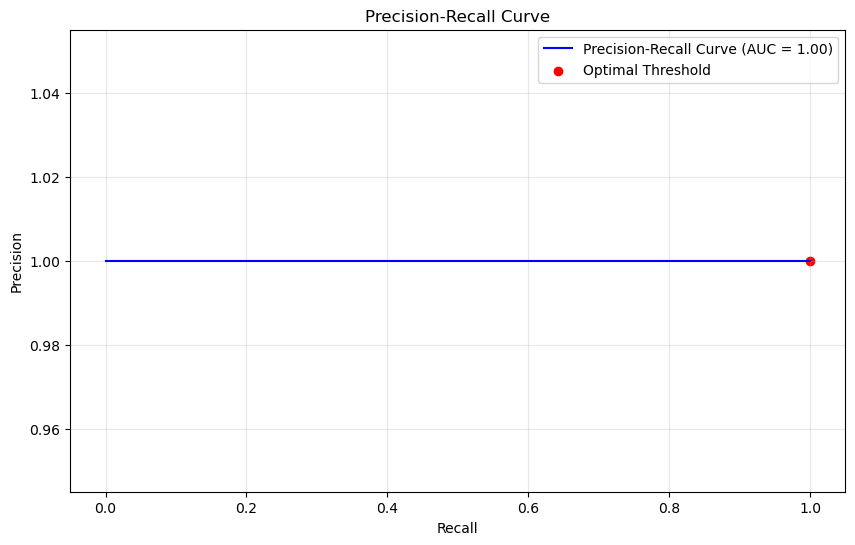

In [28]:
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Replace 'ground_truth' with your actual labels (1 for anomalies, 0 for normal points)
# Example: ground_truth = np.array([...])
# Assuming 'Anomaly' column exists in your dataset, where 1 = Anomaly, 0 = Normal

data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE_balanced.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿ÃÂ¯ÃÂ»ÃÂ¿ÃÂÃÂ¯ÃÂÃÂ»ÃÂÃÂ¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)', 'Anomaly']]

ground_truth = data['Anomaly'].values

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(ground_truth, anomaly_scores_test)

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Optimal threshold based on F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid divide by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute final metrics with the optimal threshold
predicted_labels = anomaly_scores_test > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.2f}, Recall: {recall_final:.2f}, F1-Score: {f1_final:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [33]:
# Final evaluation with optimal threshold
predicted_labels = anomaly_scores_test > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

# Print metrics with more decimal places
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.4f}, Recall: {recall_final:.4f}, F1-Score: {f1_final:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")


Optimal Threshold: 0.0595
Precision: 1.0000, Recall: 0.9545, F1-Score: 0.9767
AUC-PR: 1.0000


Confusion Matrix:
[[478   0]
 [  0  22]]

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       478
     Anomaly       1.00      1.00      1.00        22

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



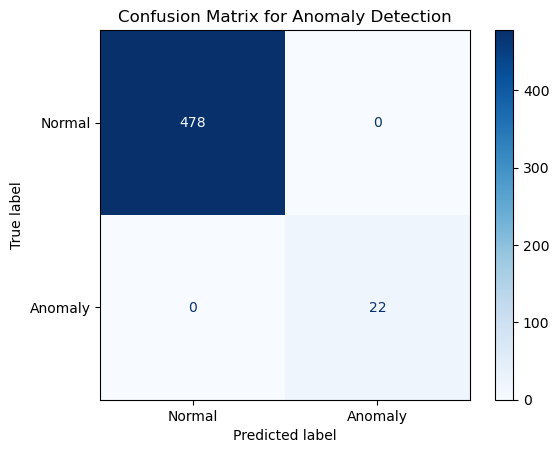

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'True_Anomaly' column exists in the original dataset
true_labels = data['Anomaly']  # Replace with your column name if different
predicted_labels = (anomaly_scores_test > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()

# Validation dataset

[I 2024-12-01 09:05:15,146] A new study created in memory with name: no-name-85699c47-0a97-47c5-be83-d941648099b6
C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_31044\1048479763.py:75: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-12-01 09:06:07,865] Trial 0 finished with value: 0.2423079177737236 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 48, 'latent_dim': 14, 'learning_rate': 0.0005231453493494051, 'batch_size': 64}. Best is trial 0 with value: 0.2423079177737236.
[I 2024-12-01 09:08:03,945] Trial 1 finished with value: 0.24767963886260985 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 16, 'latent_dim': 14, 'learning_rate': 0.0037168717746415953, 'batch_size': 16}. Best is trial 0 with value: 0.2423079177737236.
[I 2024-12-01 09:10

[I 2024-12-01 09:36:44,924] Trial 30 finished with value: 0.24182400703430176 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 32, 'latent_dim': 2, 'learning_rate': 0.0006005645201776992, 'batch_size': 64}. Best is trial 12 with value: 0.2411701649427414.
[I 2024-12-01 09:37:31,943] Trial 31 finished with value: 0.24205873310565948 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 32, 'latent_dim': 8, 'learning_rate': 0.00014090557741345755, 'batch_size': 64}. Best is trial 12 with value: 0.2411701649427414.
[I 2024-12-01 09:38:20,535] Trial 32 finished with value: 0.24231187105178834 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 32, 'latent_dim': 8, 'learning_rate': 0.00018405828458233184, 'batch_size': 64}. Best is trial 12 with value: 0.2411701649427414.
[I 2024-12-01 09:39:06,967] Trial 33 finished with value: 0.24236505925655366 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 16, 'latent_dim': 6, 'learning_rate': 0.0001266559315889336, 'batch_size': 64}. Best is trial

[I 2024-12-01 10:06:24,314] Trial 62 finished with value: 0.24200088530778885 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 32, 'latent_dim': 12, 'learning_rate': 0.0002489420482299067, 'batch_size': 64}. Best is trial 35 with value: 0.24115442782640456.
[I 2024-12-01 10:07:13,385] Trial 63 finished with value: 0.24207013994455337 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 32, 'latent_dim': 4, 'learning_rate': 0.0001222226634891523, 'batch_size': 64}. Best is trial 35 with value: 0.24115442782640456.
[I 2024-12-01 10:08:02,421] Trial 64 finished with value: 0.24248456805944443 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 32, 'latent_dim': 8, 'learning_rate': 0.0004132156419905584, 'batch_size': 64}. Best is trial 35 with value: 0.24115442782640456.
[I 2024-12-01 10:08:52,536] Trial 65 finished with value: 0.24264067709445952 and parameters: {'hidden_dim1': 96, 'hidden_dim2': 32, 'latent_dim': 6, 'learning_rate': 0.0005825756696403904, 'batch_size': 64}. Best is tri

[I 2024-12-01 10:33:17,010] Trial 94 finished with value: 0.24143550992012025 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 48, 'latent_dim': 6, 'learning_rate': 0.0001636016203495402, 'batch_size': 64}. Best is trial 93 with value: 0.24097341895103455.
[I 2024-12-01 10:34:08,416] Trial 95 finished with value: 0.24126458019018174 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.0001637471166268841, 'batch_size': 64}. Best is trial 93 with value: 0.24097341895103455.
[I 2024-12-01 10:34:59,320] Trial 96 finished with value: 0.24168130606412888 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00019322562383485887, 'batch_size': 64}. Best is trial 93 with value: 0.24097341895103455.
[I 2024-12-01 10:35:50,118] Trial 97 finished with value: 0.24155987054109573 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00016679549492614444, 'batch_size': 64}. Best 

Best hyperparameters: {'hidden_dim1': 128, 'hidden_dim2': 48, 'latent_dim': 16, 'learning_rate': 0.00013892885053916012, 'batch_size': 64}
7/7 [==============================] - 0s 1ms/step
Best validation fold loss: 0.2204105705022812
Anomaly threshold: 0.04265555184043452
Number of anomalies detected in the best validation fold: 10


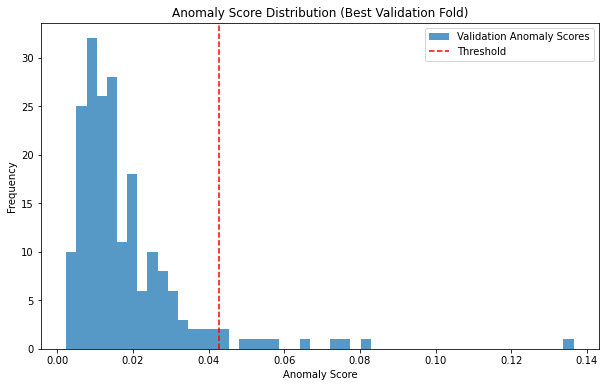

Anomaly-labeled best validation fold saved to C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Best_Validation_Fold_Anomaly_Detection_Results.xlsx.


In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

# Load and preprocess the data
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Define the Sampling layer for VAE
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# Define VAE architecture
def build_vae(input_dim, hidden_dims, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = inputs
    for dim in hidden_dims:
        x = Dense(dim, activation='relu')(x)
    mean = Dense(latent_dim)(x)
    log_var = Dense(latent_dim)(x)
    z = Sampling()([mean, log_var])
    encoder = Model(inputs, [mean, log_var, z], name="encoder")
    
    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = latent_inputs
    for dim in reversed(hidden_dims):
        x = Dense(dim, activation='relu')(x)
    outputs = Dense(input_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name="decoder")
    
    # VAE Model
    reconstructed = decoder(encoder(inputs)[2])
    vae = Model(inputs, reconstructed, name="vae")
    
    # VAE Loss
    reconstruction_loss = mse(inputs, reconstructed) * input_dim
    kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=16)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    latent_dim = trial.suggest_int('latent_dim', 2, 16, step=2)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 64, step=16)
    
    hidden_dims = [hidden_dim1, hidden_dim2]
    vae, _, _ = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        history = vae.fit(x_train_fold, x_train_fold, validation_data=(x_val_fold, x_val_fold), 
                          epochs=100, batch_size=batch_size, verbose=0)
        val_loss = min(history.history['val_loss'])
        val_losses.append(val_loss)
    
    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final VAE using the best hyperparameters
hidden_dims = [best_params['hidden_dim1'], best_params['hidden_dim2']]
latent_dim = best_params['latent_dim']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']

vae, encoder, decoder = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

# Perform 10-fold cross-validation and detect anomalies in the best validation fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_val_loss = float('inf')
best_x_val_fold = None
fold = 1

for train_index, val_index in kf.split(X_train):
    x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
    history = vae.fit(x_train_fold, x_train_fold, epochs=100, batch_size=batch_size, verbose=0, validation_data=(x_val_fold, x_val_fold))
    
    val_loss = min(history.history['val_loss'])
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_x_val_fold = x_val_fold
    fold += 1

# Anomaly detection on the best validation fold
val_reconstructions = vae.predict(best_x_val_fold)
val_anomaly_scores = np.mean(np.square(best_x_val_fold - val_reconstructions), axis=1)

# Set an anomaly threshold
threshold = np.percentile(val_anomaly_scores, 95)  # Top 5% as anomalies
val_anomalies = val_anomaly_scores > threshold

# Print anomaly results for the best validation fold
print(f"Best validation fold loss: {best_val_loss}")
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected in the best validation fold: {np.sum(val_anomalies)}")

# Visualize anomaly scores for the best validation fold
plt.figure(figsize=(10, 6))
plt.hist(val_anomaly_scores, bins=50, alpha=0.75, label='Validation Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution (Best Validation Fold)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Save the best validation fold with anomaly labels
val_data_with_anomalies = pd.DataFrame(best_x_val_fold, columns=data.columns)
val_data_with_anomalies['Anomaly'] = val_anomalies.astype(int)
output_path = 'C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Best_Validation_Fold_Anomaly_Detection_Results.xlsx'
val_data_with_anomalies.to_excel(output_path, index=False)
print(f"Anomaly-labeled best validation fold saved to {output_path}.")

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Best_Validation_Fold_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data

,ï»¿Ã¯Â»Â¿ÃÂ¯ÃÂ»ÃÂ¿Discharge Temp (F),Input % full load amps (Motor) (%),Condenser liq temp IN (F),Condenser liq temp OUT (F),Chilled liq temp IN (F),Chilled liq temp OUT (F),Condenser saturation (F),Evaporator saturation (F),Evaporator pressure (PSIG),Condenser pressure (PSIG),Oil sump temp (F),Oil pressure (PSIG),Anomaly
0,0.835751,0.770879,0.769941,0.754086,0.130602,0.696726,0.541466,0.334398,0.414817,0.712742,0.344779,0.361480,0
1,0.743357,0.760360,0.825080,0.747987,0.088761,0.714746,0.752139,0.165532,0.398292,0.846534,0.601721,0.517644,0
2,0.503109,0.614225,0.608921,0.633299,0.351352,0.847328,0.626913,0.494544,0.370956,0.755080,0.523978,0.405076,0
3,0.546309,0.682296,0.324209,0.535842,0.490645,0.705744,0.442835,0.423940,0.604611,0.385105,0.590921,0.518744,0
4,0.781766,0.833576,0.803901,0.807300,0.187644,0.802547,0.780873,0.181710,0.210528,0.776143,0.395540,0.532162,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.530927,0.643167,0.586289,0.510786,0.362560,0.688023,0.428096,0.521500,0.385950,0.557598,0.396739,0.551465,0
196,0.807433,0.772594,0.756201,0.818874,0.226125,0.815574,0.754447,0.151186,0.369626,0.753194,0.661139,0.451757,0
197,0.887888,0.803779,0.815505,0.788194,0.183560,0.814443,0.703195,0.311406,0.257347,0.786065,0.477411,0.399349,0
198,0.570467,0.638956,0.631553,0.531716,0.494973,0.571817,0.600006,0.566320,0.545765,0.669983,0.524817,0.370273,0


Optimal Threshold: 0.0426
Precision: 0.90, Recall: 0.90, F1-Score: 0.90
AUC-PR: 0.99


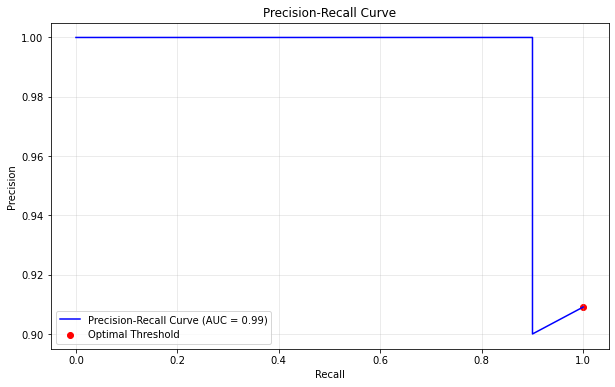

In [5]:
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Replace 'ground_truth' with your actual labels (1 for anomalies, 0 for normal points)
# Example: ground_truth = np.array([...])
# Assuming 'Anomaly' column exists in your dataset, where 1 = Anomaly, 0 = Normal
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Best_Validation_Fold_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿ÃÂ¯ÃÂ»ÃÂ¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)', 'Anomaly']]


ground_truth = data['Anomaly'].values

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(ground_truth, val_anomaly_scores)

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Optimal threshold based on F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid divide by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute final metrics with the optimal threshold
predicted_labels = val_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.2f}, Recall: {recall_final:.2f}, F1-Score: {f1_final:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [6]:
# Final evaluation with optimal threshold
predicted_labels = val_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

# Print metrics with more decimal places
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.4f}, Recall: {recall_final:.4f}, F1-Score: {f1_final:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

Optimal Threshold: 0.0426
Precision: 0.9000, Recall: 0.9000, F1-Score: 0.9000
AUC-PR: 0.9905


Confusion Matrix:
[[189   1]
 [  1   9]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99       190
     Anomaly       0.90      0.90      0.90        10

    accuracy                           0.99       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.99      0.99      0.99       200



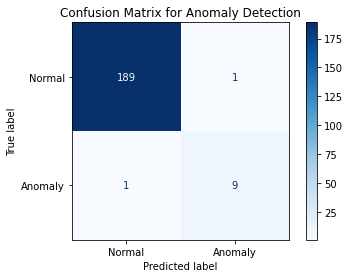

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'True_Anomaly' column exists in the original dataset
true_labels = data['Anomaly']  # Replace with your column name if different
predicted_labels = (val_anomaly_scores > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()

# Test dataset

[I 2024-12-04 08:58:03,542] A new study created in memory with name: no-name-61af4b7c-fc23-466b-a512-eeddc1fdd9ea
C:\Users\Hsiao-ping.ni\AppData\Local\Temp\ipykernel_31044\4143755308.py:76: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
[I 2024-12-04 09:00:56,735] Trial 0 finished with value: 0.2470564901828766 and parameters: {'hidden_dim1': 128, 'hidden_dim2': 16, 'latent_dim': 8, 'learning_rate': 0.00013552375264856814, 'batch_size': 16}. Best is trial 0 with value: 0.2470564901828766.
[I 2024-12-04 09:02:02,360] Trial 1 finished with value: 0.24344003349542617 and parameters: {'hidden_dim1': 112, 'hidden_dim2': 32, 'latent_dim': 2, 'learning_rate': 0.0034830369293731506, 'batch_size': 64}. Best is trial 1 with value: 0.24344003349542617.
[I 2024-12-04 09:0

[I 2024-12-04 09:48:43,442] Trial 30 finished with value: 0.24209263771772385 and parameters: {'hidden_dim1': 64, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.0007380398171044766, 'batch_size': 64}. Best is trial 20 with value: 0.240257166326046.
[I 2024-12-04 09:50:06,170] Trial 31 finished with value: 0.24182641506195068 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00017528701155827326, 'batch_size': 64}. Best is trial 20 with value: 0.240257166326046.
[I 2024-12-04 09:51:27,885] Trial 32 finished with value: 0.2421010449528694 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00010312715423986115, 'batch_size': 64}. Best is trial 20 with value: 0.240257166326046.
[I 2024-12-04 09:52:54,234] Trial 33 finished with value: 0.2413593888282776 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.00014157319710188712, 'batch_size': 64}. Best is trial 2

[I 2024-12-04 10:42:22,352] Trial 62 finished with value: 0.24121164977550508 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00015254244952683503, 'batch_size': 64}. Best is trial 55 with value: 0.24023259431123734.
[I 2024-12-04 10:43:57,398] Trial 63 finished with value: 0.24076277762651443 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.00011801902108963129, 'batch_size': 64}. Best is trial 55 with value: 0.24023259431123734.
[I 2024-12-04 10:45:30,483] Trial 64 finished with value: 0.2411838099360466 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 12, 'learning_rate': 0.00012102708214296111, 'batch_size': 64}. Best is trial 55 with value: 0.24023259431123734.
[I 2024-12-04 10:46:59,738] Trial 65 finished with value: 0.2416459232568741 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.00020513077434683246, 'batch_size': 64}. Best is 

[I 2024-12-04 11:38:17,429] Trial 94 finished with value: 0.2411787047982216 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00012873889903269487, 'batch_size': 64}. Best is trial 55 with value: 0.24023259431123734.
[I 2024-12-04 11:40:01,215] Trial 95 finished with value: 0.2414369761943817 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 14, 'learning_rate': 0.00017542510295510987, 'batch_size': 64}. Best is trial 55 with value: 0.24023259431123734.
[I 2024-12-04 11:41:47,581] Trial 96 finished with value: 0.24176685512065887 and parameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.0001452876644179739, 'batch_size': 64}. Best is trial 55 with value: 0.24023259431123734.
[I 2024-12-04 11:43:31,818] Trial 97 finished with value: 0.24120193123817443 and parameters: {'hidden_dim1': 32, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00011267643690735702, 'batch_size': 64}. Best is t

Best hyperparameters: {'hidden_dim1': 48, 'hidden_dim2': 64, 'latent_dim': 16, 'learning_rate': 0.00015728012188007424, 'batch_size': 64}
Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7869
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5529
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4451
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3863
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3464
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3213
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3124
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2978
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2937
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2876
Epoch 11/100
32/32 [==============================] - 0s 3ms/

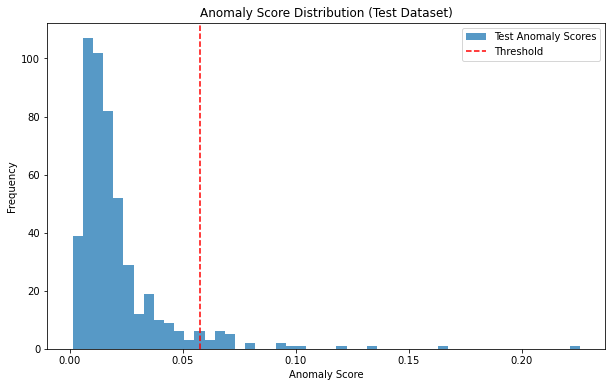

Anomaly-labeled test dataset saved to C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Test_Anomaly_Detection_Results.xlsx.


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

# Load and preprocess the data
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Augmented_Chiller_Data.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/LT_Chiller_Data.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)']]

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split data into training (80%) and testing (20%) sets
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# Define the Sampling layer for VAE
class Sampling(Layer):
    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# Define VAE architecture
def build_vae(input_dim, hidden_dims, latent_dim):
    # Encoder
    inputs = Input(shape=(input_dim,))
    x = inputs
    for dim in hidden_dims:
        x = Dense(dim, activation='relu')(x)
    mean = Dense(latent_dim)(x)
    log_var = Dense(latent_dim)(x)
    z = Sampling()([mean, log_var])
    encoder = Model(inputs, [mean, log_var, z], name="encoder")
    
    # Decoder
    latent_inputs = Input(shape=(latent_dim,))
    x = latent_inputs
    for dim in reversed(hidden_dims):
        x = Dense(dim, activation='relu')(x)
    outputs = Dense(input_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name="decoder")
    
    # VAE Model
    reconstructed = decoder(encoder(inputs)[2])
    vae = Model(inputs, reconstructed, name="vae")
    
    # VAE Loss
    reconstruction_loss = mse(inputs, reconstructed) * input_dim
    kl_loss = 1 + log_var - tf.square(mean) - tf.exp(log_var)
    kl_loss = tf.reduce_sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    
    return vae, encoder, decoder

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=16)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    latent_dim = trial.suggest_int('latent_dim', 2, 16, step=2)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
    batch_size = trial.suggest_int('batch_size', 16, 64, step=16)
    
    hidden_dims = [hidden_dim1, hidden_dim2]
    vae, _, _ = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
    
    # 10-Fold Cross Validation
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        x_train_fold, x_val_fold = X_train[train_index], X_train[val_index]
        history = vae.fit(x_train_fold, x_train_fold, validation_data=(x_val_fold, x_val_fold), 
                          epochs=100, batch_size=batch_size, verbose=0)
        val_loss = min(history.history['val_loss'])
        val_losses.append(val_loss)
    
    return np.mean(val_losses)

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final VAE using the best hyperparameters
hidden_dims = [best_params['hidden_dim1'], best_params['hidden_dim2']]
latent_dim = best_params['latent_dim']
learning_rate = best_params['learning_rate']
batch_size = best_params['batch_size']

vae, encoder, decoder = build_vae(input_dim=X_train.shape[1], hidden_dims=hidden_dims, latent_dim=latent_dim)
vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
history = vae.fit(X_train, X_train, epochs=100, batch_size=batch_size, verbose=1)

# Anomaly detection on the test dataset
reconstructions = vae.predict(X_test)
test_anomaly_scores = np.mean(np.square(X_test - reconstructions), axis=1)

# Set an anomaly threshold
threshold = np.percentile(test_anomaly_scores, 95)  # Top 5% as anomalies
test_anomalies = test_anomaly_scores > threshold

# Print anomaly results for the test dataset
print(f"Anomaly threshold: {threshold}")
print(f"Number of anomalies detected in the test dataset: {np.sum(test_anomalies)}")

# Visualize anomaly scores for the test dataset
plt.figure(figsize=(10, 6))
plt.hist(test_anomaly_scores, bins=50, alpha=0.75, label='Test Anomaly Scores')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold')
plt.title('Anomaly Score Distribution (Test Dataset)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Add anomaly labels to the test dataset
test_data_with_anomalies = pd.DataFrame(X_test, columns=data.columns)
test_data_with_anomalies['Anomaly'] = test_anomalies.astype(int)

# Save the test dataset with anomaly labels to an Excel file
output_path = 'C:/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Test_Anomaly_Detection_Results.xlsx'
#output_path = '/Users/hsiaopingni/Desktop/VAE_Test_Anomaly_Detection_Results.xlsx'
test_data_with_anomalies.to_excel(output_path, index=False)
print(f"Anomaly-labeled test dataset saved to {output_path}.")

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
import optuna

data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Test_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data

In [ ]:
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Replace 'ground_truth' with your actual labels (1 for anomalies, 0 for normal points)
# Example: ground_truth = np.array([...])
# Assuming 'Anomaly' column exists in your dataset, where 1 = Anomaly, 0 = Normal
data = pd.read_csv('/Users/Hsiao-ping.ni/ASU Dropbox/Hsiao-Ping Ni/PhD/Data/4th paper- Chiller/VAE_Balanced_Test_Anomaly_Detection_Results.csv', encoding='unicode_escape')
#data = pd.read_csv('/Users/hsiaopingni/Desktop/Hsiao-Ping PhD/Data/paper- Chiller/Anomaly_Detection_Results_VAE.csv', encoding='unicode_escape')
data = data[['ï»¿Ã¯Â»Â¿Discharge Temp (F)', 'Input % full load amps (Motor) (%)', 'Condenser liq temp IN (F)',
             'Condenser liq temp OUT (F)', 'Chilled liq temp IN (F)', 'Chilled liq temp OUT (F)',
             'Condenser saturation (F)', 'Evaporator saturation (F)', 'Evaporator pressure (PSIG)',
             'Condenser pressure (PSIG)', 'Oil sump temp (F)', 'Oil pressure (PSIG)', 'Anomaly']]


ground_truth = data['Anomaly'].values

# Compute precision, recall, and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(ground_truth, test_anomaly_scores)

# Compute AUC-PR
auc_pr = auc(recall, precision)

# Optimal threshold based on F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid divide by zero
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

# Compute final metrics with the optimal threshold
predicted_labels = test_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.2f}, Recall: {recall_final:.2f}, F1-Score: {f1_final:.2f}")
print(f"AUC-PR: {auc_pr:.2f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})', color='blue')
plt.scatter(recall[optimal_idx], precision[optimal_idx], marker='o', color='red', label='Optimal Threshold')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Final evaluation with optimal threshold
predicted_labels = test_anomaly_scores > optimal_threshold
precision_final = precision_score(ground_truth, predicted_labels)
recall_final = recall_score(ground_truth, predicted_labels)
f1_final = f1_score(ground_truth, predicted_labels)

# Print metrics with more decimal places
print(f"Optimal Threshold: {optimal_threshold:.4f}")
print(f"Precision: {precision_final:.4f}, Recall: {recall_final:.4f}, F1-Score: {f1_final:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'True_Anomaly' column exists in the original dataset
true_labels = data['Anomaly']  # Replace with your column name if different
predicted_labels = (test_anomaly_scores > threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Normal', 'Anomaly']))

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Anomaly Detection")
plt.show()